In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import folium
import json

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

geo_str = json.load(open('TL_SCCO_CTPRVN_WGS84 (1).json', encoding='utf-8'))

In [19]:
import pandas as pd
df = pd.read_excel('./시도별병원수.xls', index_col=0) 

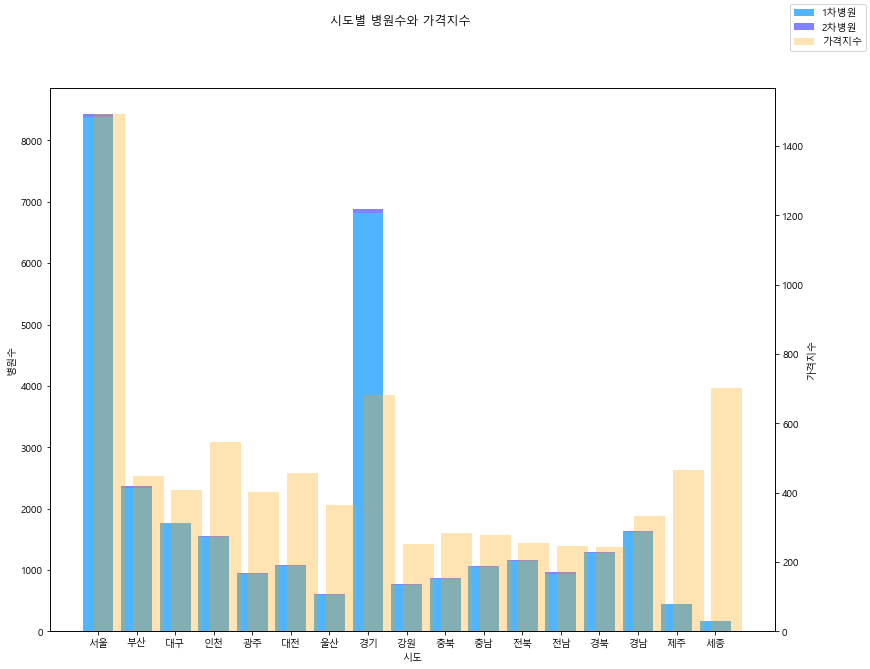

In [20]:
fig, ax1 = plt.subplots(figsize=(13,10))
fig.suptitle('시도별 병원수와 가격지수')

ax1.bar(df['행정구역별(2)'], df['병원수'], label='1차병원',  color='#50B4FF')
ax1.bar(df['행정구역별(2)'], df['종합병원'], label='2차병원',  color='#8282FF',bottom=df['병원수'])
ax1.set_ylabel('병원수')
ax1.set_xlabel('시도')

ax2 = ax1.twinx() 
ax2.bar(df.index+0.30, df['2021. 09'], label='가격지수',  color='orange', alpha=0.3)
ax2.set_ylabel('가격지수')

fig.legend()

In [21]:
df['총병원수'] = df['병원수'] + df['종합병원']

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


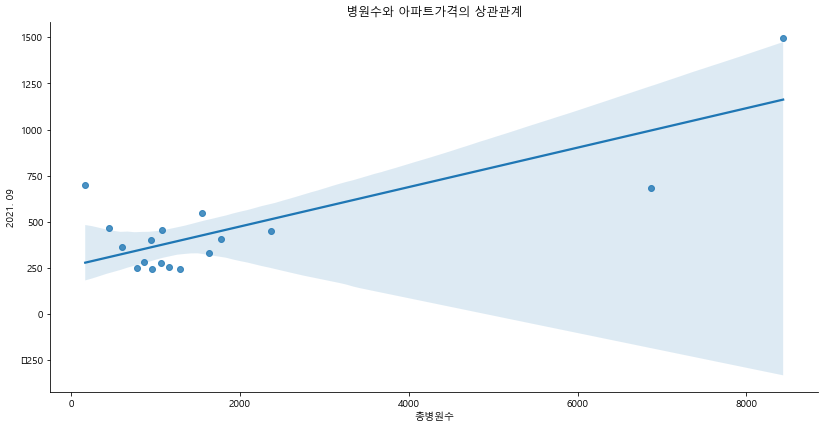

In [22]:
g = sns.lmplot(data=df, x='총병원수',y='2021. 09')
g.fig.set_size_inches(13,6)
g.set(title='병원수와 아파트가격의 상관관계')

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


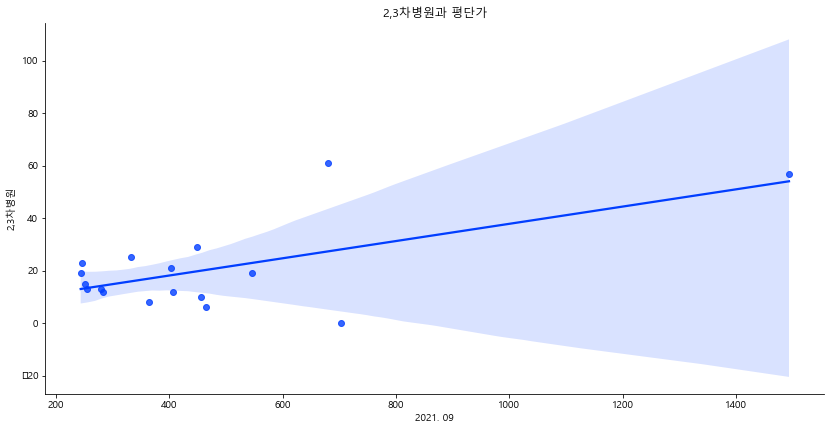

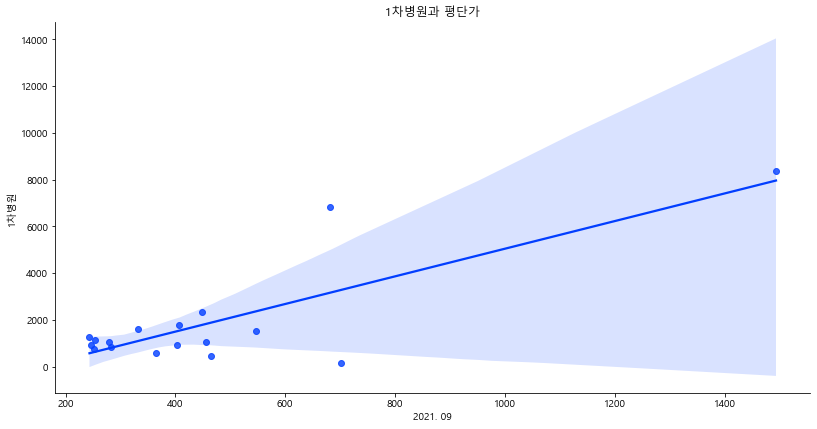

In [23]:
palette = sns.set_palette('bright')
r1 = sns.lmplot(data=df , x='2021. 09', y='종합병원', palette=palette)
r1.fig.set_size_inches(13,6)
r1.set(title='2,3차병원과 평단가', ylabel='2,3차병원')

r2 = sns.lmplot(data=df , x='2021. 09', y='병원수')
r2.fig.set_size_inches(13,6)
r2.set(title='1차병원과 평단가', ylabel='1차병원')

In [24]:
map_df = pd.read_excel('./병원프레임.xlsx', index_col=0) 
map_df.set_index('지역별', inplace=True)
map_df.rename(columns={'2021. 09':'아파트평균매매가격'}, inplace=True)
map_df

,행정구역별(1),아파트평균매매가격,병원수,비율,종합병원,총병원수,경도,위도
지역별,,,,,,,,
서울,서울,1493.5,8379,1.782432,57,8436,126.981642,37.570378
부산,광역시,449.0,2340,1.918803,29,2369,129.094319,35.240078
대구,NaN,406.8,1759,2.312678,12,1771,128.632867,35.855208
인천,NaN,546.6,1531,3.570216,19,1550,126.721907,37.507842
광주,NaN,402.2,931,4.320086,21,952,126.923090,35.146278
대전,NaN,456.5,1069,4.270346,10,1079,127.356136,36.364056
울산,NaN,365.0,596,6.124161,8,604,129.416692,35.505170
경기,도,680.8,6815,0.998973,61,6876,127.257786,37.414506
강원,NaN,251.2,763,3.292267,15,778,128.878497,37.749136


In [25]:
import pandas as pd
df = pd.read_excel('./시도별병원수.xls', index_col=0) 
df

,행정구역별(1),행정구역별(2),2021. 09,병원수,비율,종합병원,총병원수
0,서울,서울,1493.5,8379,1.782432,57,8436
1,광역시,부산,449.0,2340,1.918803,29,2369
2,NaN,대구,406.8,1759,2.312678,12,1771
3,NaN,인천,546.6,1531,3.570216,19,1550
4,NaN,광주,402.2,931,4.320086,21,952
5,NaN,대전,456.5,1069,4.270346,10,1079
6,NaN,울산,365.0,596,6.124161,8,604
7,도,경기,680.8,6815,0.998973,61,6876
8,NaN,강원,251.2,763,3.292267,15,778
9,NaN,충북,283.0,858,3.298368,12,870


In [32]:
df = pd.read_excel('./병원모듈용.xlsx', index_col=0) 
# df.set_index('지역별', inplace=True)
# df.drop(['행정구역별(1)'], axis=1, inplace=True)
# df.rename(columns={'비율':'병원비율'}, inplace=True)
df

,아파트평균매매가격,병원수,병원비율,종합병원,총병원수,경도,위도
지역별,,,,,,,
서울,1493.5,8379,1.782432,57,8436,126.981642,37.570378
부산,449.0,2340,1.918803,29,2369,129.094319,35.240078
대구,406.8,1759,2.312678,12,1771,128.632867,35.855208
인천,546.6,1531,3.570216,19,1550,126.721907,37.507842
광주,402.2,931,4.320086,21,952,126.923090,35.146278
대전,456.5,1069,4.270346,10,1079,127.356136,36.364056
울산,365.0,596,6.124161,8,604,129.416692,35.505170
경기,680.8,6815,0.998973,61,6876,127.257786,37.414506
강원,251.2,763,3.292267,15,778,128.878497,37.749136


In [33]:
def print_map(location):
    map_df = df.loc[location]
    map = folium.Map(location=[36.2002, 127.054], 
                    zoom_start=7)
    map.choropleth(geo_data=geo_str, 
                data=map_df['병원비율'], 
                columns=[ map_df.index, map_df['병원비율']],
                fill_color='PuRd',
                key_on='feature.id')
    
    for sido, price, lat, lng in zip(map_df.index, map_df.아파트평균매매가격, map_df.위도, map_df.경도):
        folium.Marker(
            location=[lat, lng],
            popup = "<pre>"+sido+"<br/>평단가: "+str(price)+"</pre>",
            icon = folium.Icon()
        ).add_to(map)
        
    graph_df = df.loc[location]
    
    plt.figure(figsize=(10,6))
    plt.scatter(graph_df['병원비율'], graph_df['총병원수'], c=graph_df['아파트평균매매가격'], s=graph_df['아파트평균매매가격'], cmap='rainbow', alpha=0.8)
    plt.xlabel('병원 수 대비 평당 평균 매매가')
    plt.ylabel('병원 수')
    for name in graph_df.index:
        plt.text(graph_df['병원비율'][name], graph_df['총병원수'][name], name, fontsize=13)
    plt.colorbar()
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')
    return map


C:\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


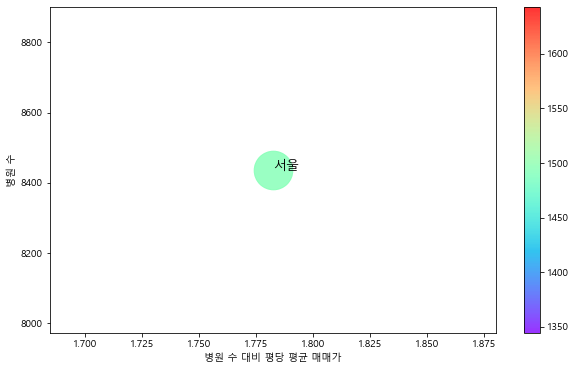

In [34]:
print_map(['서울'])